In [1]:
# minimal imports
import pandas as pd
# from plotnine.scales.scale_color import scale_color_cmap, scale_color_cmap_d
import geopandas as gp
import numpy as np
from plotnine import *
import plotnine as p9

# for graphical enhancement
from mizani.formatters import date_format, percent_format, dollar_format, comma_format
from adjustText import adjust_text  # pip install adjustText
from matplotlib import rcParams

# In most cases, you may not import them.
# you may need them If only you are adhere to color determination...
from matplotlib.pylab import cm
from matplotlib.colors import rgb2hex

# Needed by smoothing and modeling
# pip install scikit-misc
from statsmodels.formula.api import ols, glm
from statsmodels.gam.smooth_basis import BSplines
import statsmodels.api as sm

# dataset packages
from pysocviz.reader import load_dataset
from pysocviz.properties import colors
from gapminder import gapminder

gss_sm = load_dataset('gss_sm')
election = load_dataset('election')
organdata = load_dataset('organdata')
elections_historic = load_dataset('elections_historic')
asasec = load_dataset('asasec')
titanic = load_dataset('titanic')
oecd_sum = load_dataset('oecd_sum')
county_data = load_dataset('county_data')
gss_lon = load_dataset('gss_lon')
fredts = load_dataset('fredts')
yahoo = load_dataset('yahoo')
studebt = load_dataset('studebt')
bad_date = load_dataset('bad_date')
# notebook 上のサイズは以下で設定可
# TODO: 他のデバイスでは?
p9.options.figure_size = (10, 10)
# フォントファミリ名は適宜変更
# TODO: imitate hrbrthemes
theme_set(theme_minimal(base_family='Noto Sans CJK JP'))

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.


In [2]:
# --- Ch. 5 ---


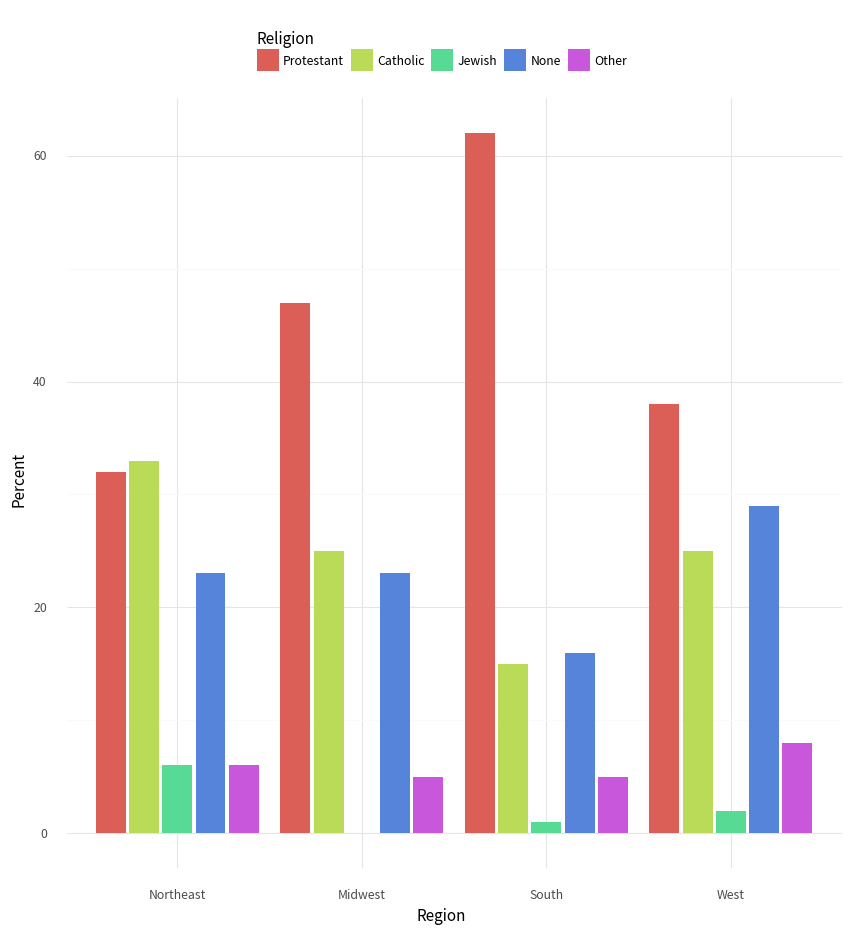

<ggplot: (8732370195700)>

In [3]:
# Fig. 5.2
#TODO None -> NA
gss_sm = load_dataset('gss_sm')
rel_by_region = gss_sm.assign(N=1).groupby(['bigregion', 'religion'])['N'].count()
rel_by_region = pd.DataFrame(
  {
    'N': rel_by_region,
    'freq': rel_by_region / rel_by_region.reset_index(
      ).groupby(['bigregion'])['N'].sum()
  }
).assign(pct=lambda d: (d['freq'] * 100).round(0)).reset_index()

p = ggplot(rel_by_region, aes(x='bigregion', y='pct', fill='religion'))
p + geom_col(position='dodge2') + labs(
  x="Region",
  y="Percent",
  fill="Religion"
) + theme(legend_position="top")

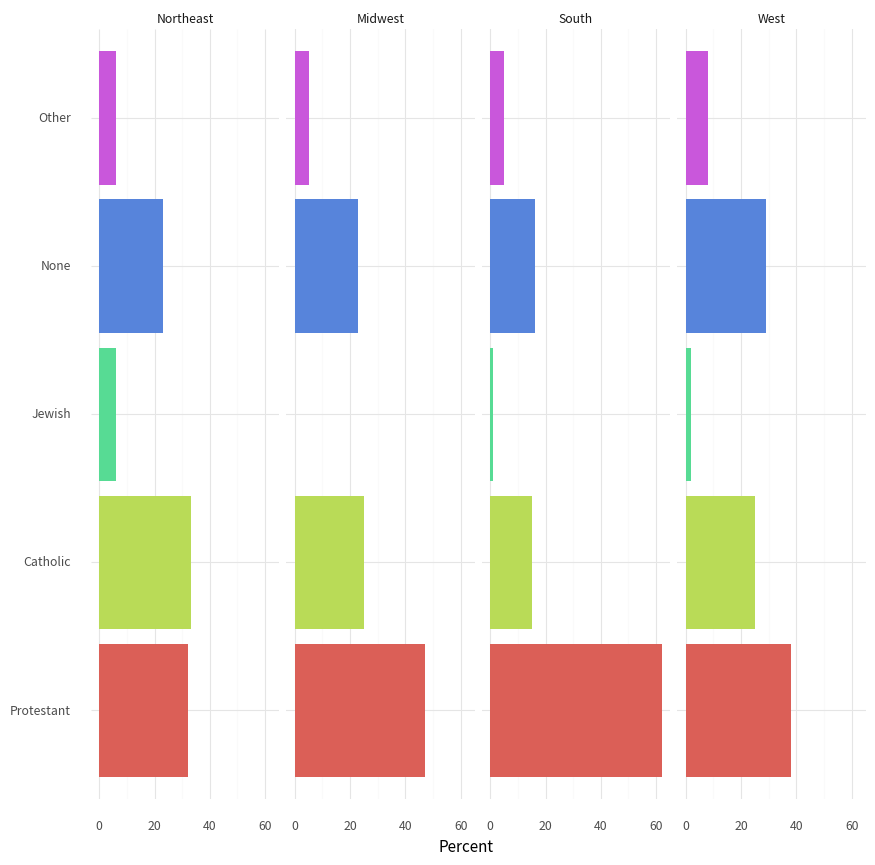

<ggplot: (8732314828785)>

In [4]:
# Fig. 5.3
p = ggplot(rel_by_region, aes(x='religion', y='pct', fill='religion'))
p + geom_col(position="dodge2") + labs(
  x=None,
  y="Percent",
  fill="Religion"
) + guides(fill=False) + coord_flip(
) + facet_grid(['.', 'bigregion'])

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


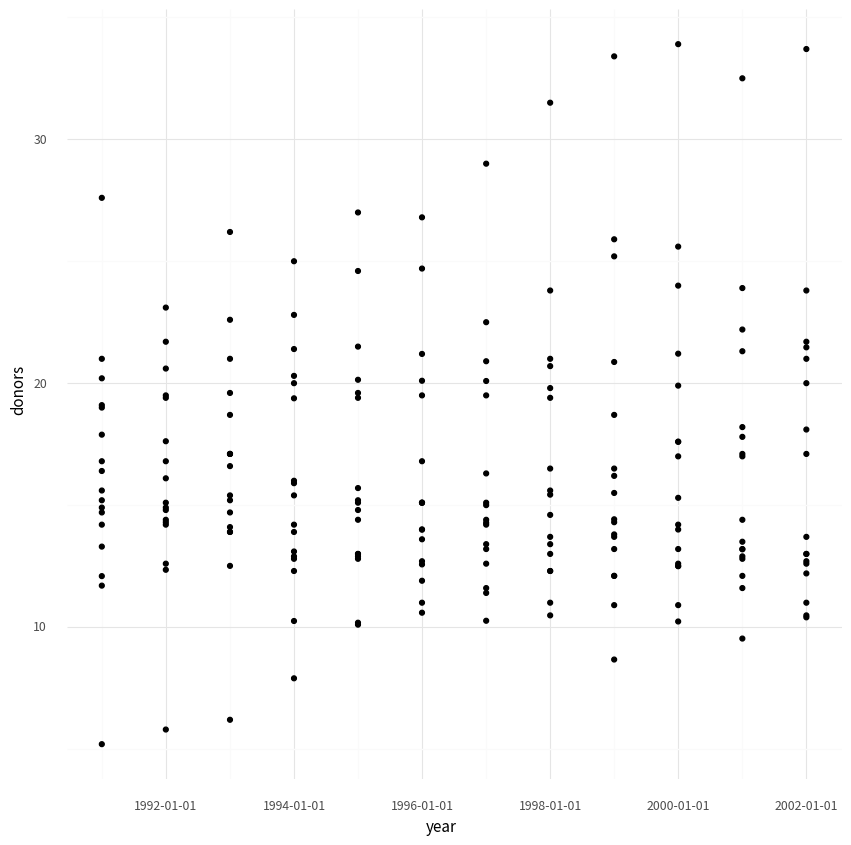

<ggplot: (8732370193601)>

In [5]:
# Fig. 5.4
p = ggplot(organdata, aes(x='year', y='donors'))
p + geom_point()

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


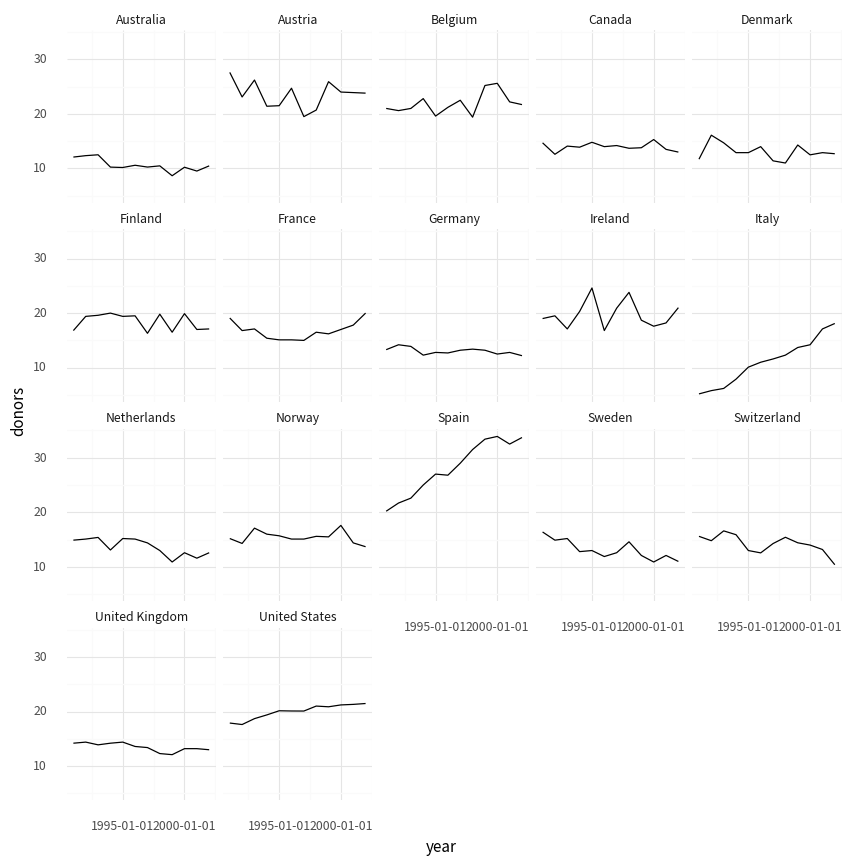

<ggplot: (8732370130854)>

In [6]:
# Fig. 5.5
# Currently (v0.8) sometimes manually thinning of breaks needed
p = ggplot(organdata, aes(x='year', y='donors'))
p + geom_line(
  aes(group='country')
) + facet_wrap(['country']
) + scale_x_date(date_breaks='5 years')

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


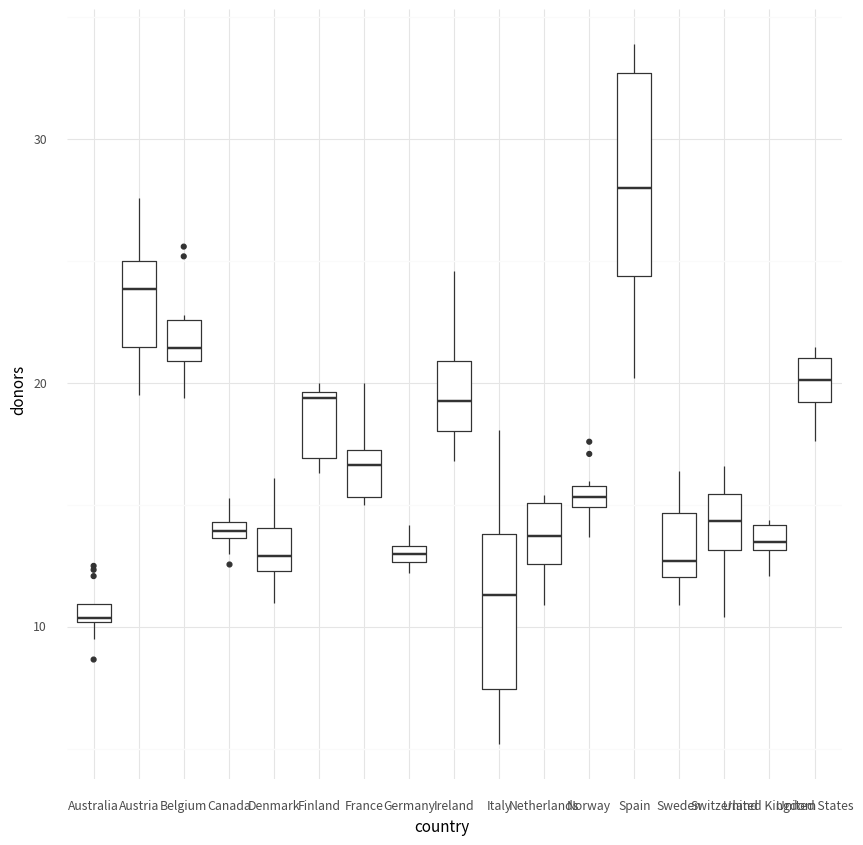

<ggplot: (8732308971409)>

In [7]:
# Fig. 5.6
p = ggplot(organdata, aes(x='country', y='donors'))
p + geom_boxplot()

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


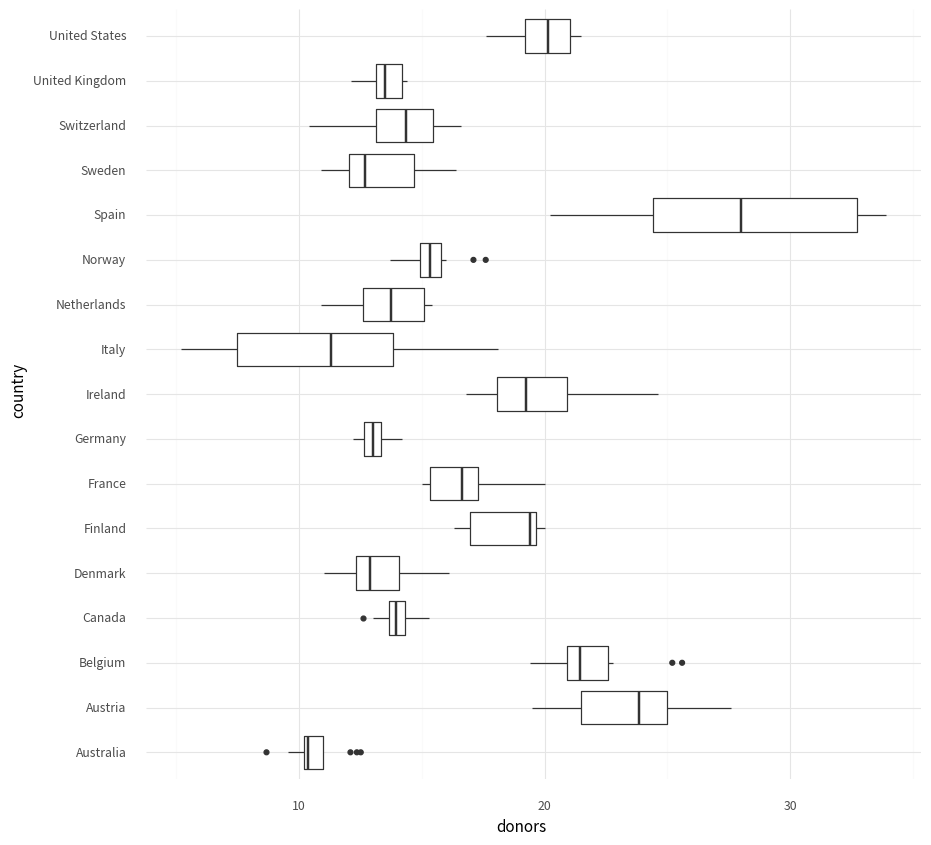

<ggplot: (8732306837261)>

In [8]:
# Fig. 5.7
p = ggplot(organdata, aes(x='country', y='donors'))
p + geom_boxplot() + coord_flip()

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


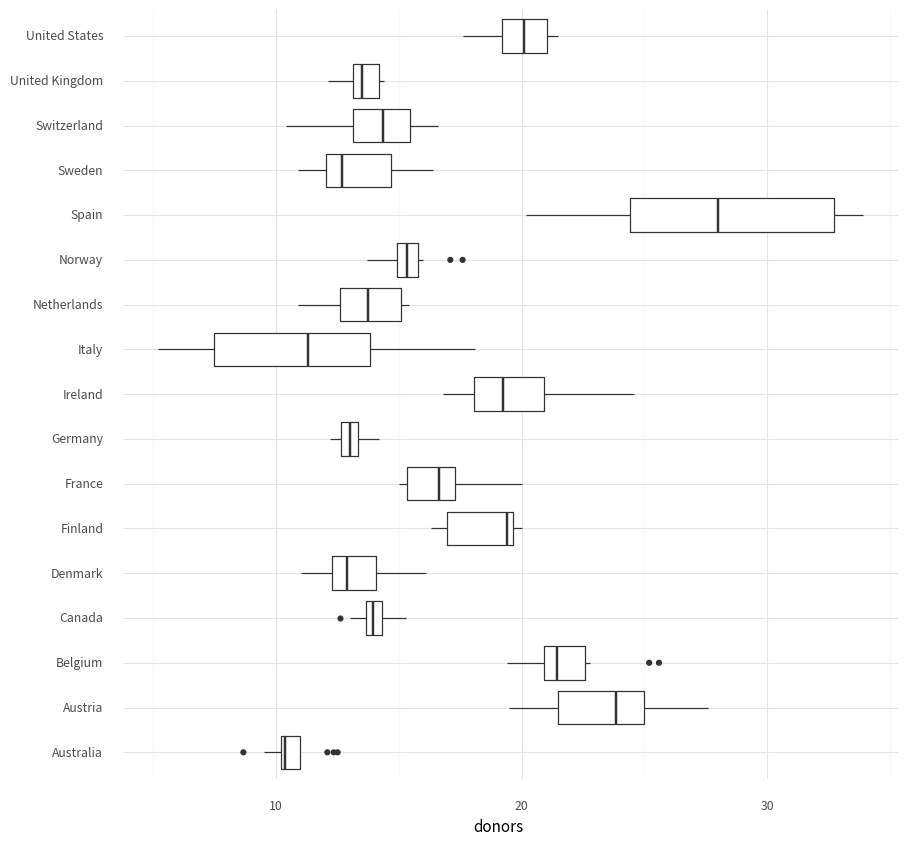

<ggplot: (8732359437608)>

In [9]:
# Fig. 5.8
p = ggplot(organdata, aes(x='reorder(country, donors)', y='donors'))
p + geom_boxplot() + labs(x=None) + coord_flip()

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 34 rows containing non-finite values.


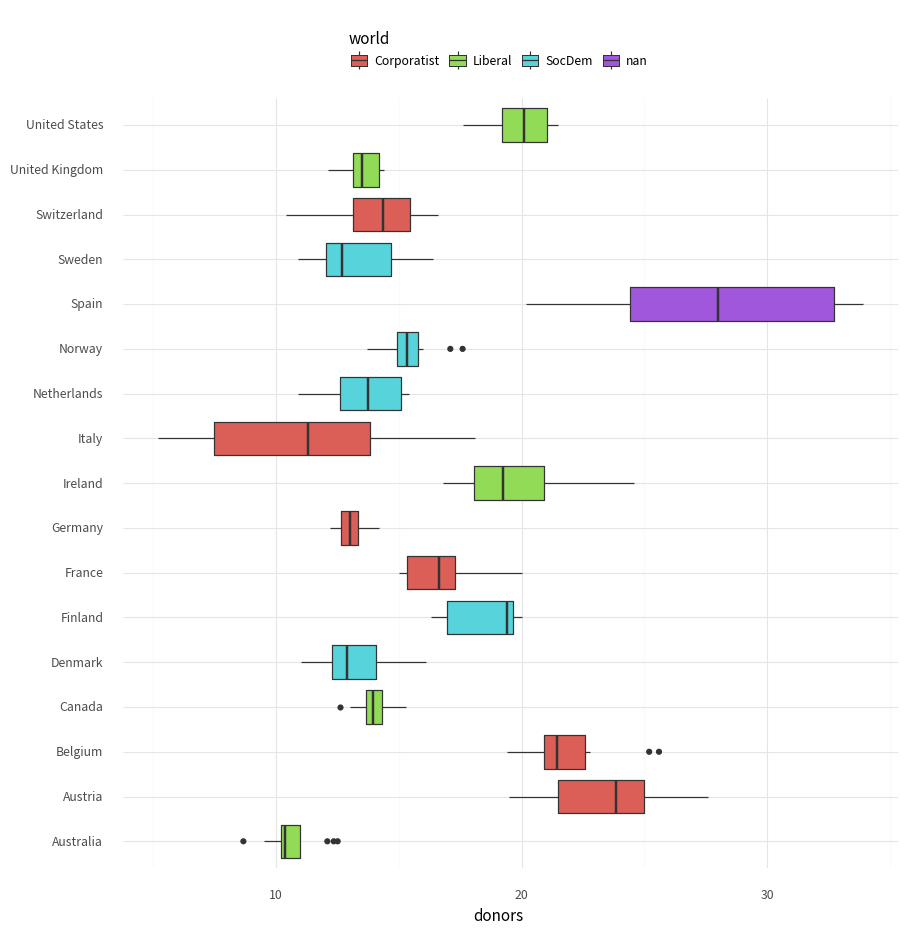

<ggplot: (8732370086416)>

In [10]:
# Fig. 5.9
p = ggplot(organdata,
           aes(x='reorder(country, donors)', y='donors', fill='world')
)
p + geom_boxplot() + labs(x=None) + coord_flip() + theme(legend_position='top')

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


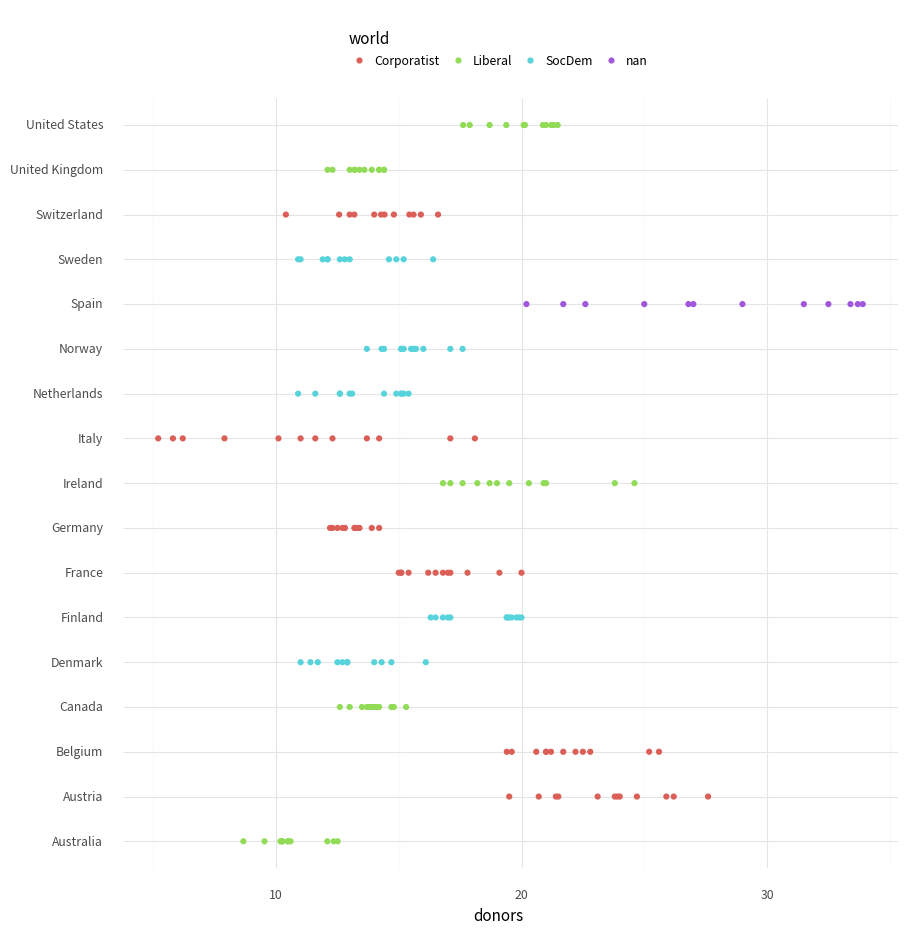

<ggplot: (8732306839908)>

In [11]:
# Fig. 5.10
p = ggplot(organdata,
           aes(x='reorder(country, donors)', y='donors', color='world')
)
p + geom_point() + labs(x=None) + coord_flip() + theme(legend_position="top")

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_jitter : Removed 34 rows containing missing values.


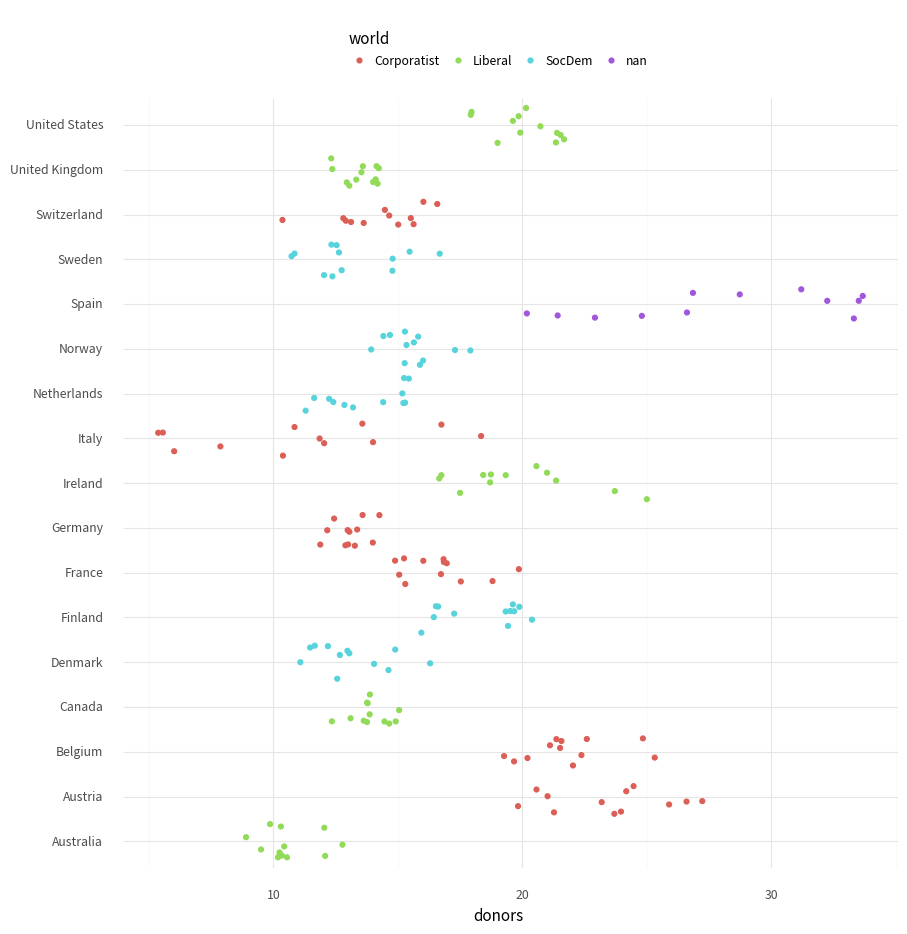

<ggplot: (8732306690591)>

In [12]:
# Fig. 5.11
p = ggplot(organdata,
           aes(x='reorder(country, donors)', y='donors', color='world')
)
p + geom_jitter() + labs(x=None) + coord_flip() + theme(legend_position="top")

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_jitter : Removed 34 rows containing missing values.


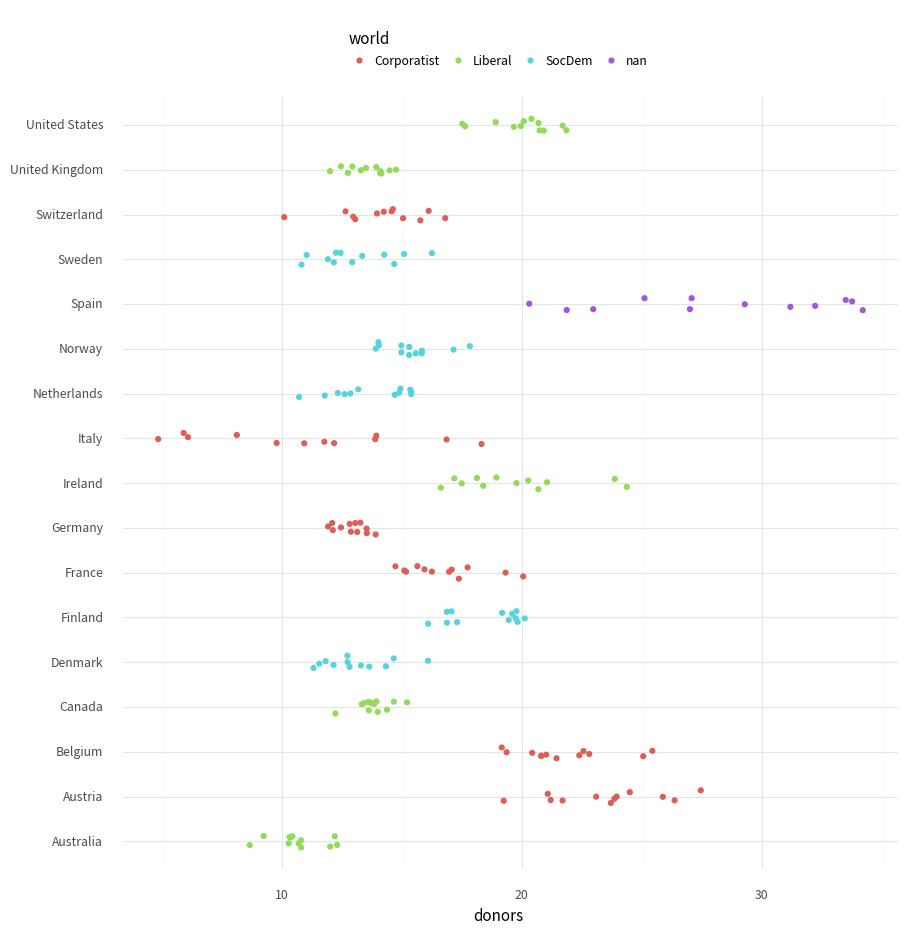

<ggplot: (8732306697813)>

In [13]:
# Fig. 5.12
p = ggplot(organdata,
           aes(x='reorder(country, donors)', y='donors', color='world')
)
p + geom_jitter(position=position_jitter(width=0.15)) + labs(
  x=None
) + coord_flip() + theme(legend_position="top")

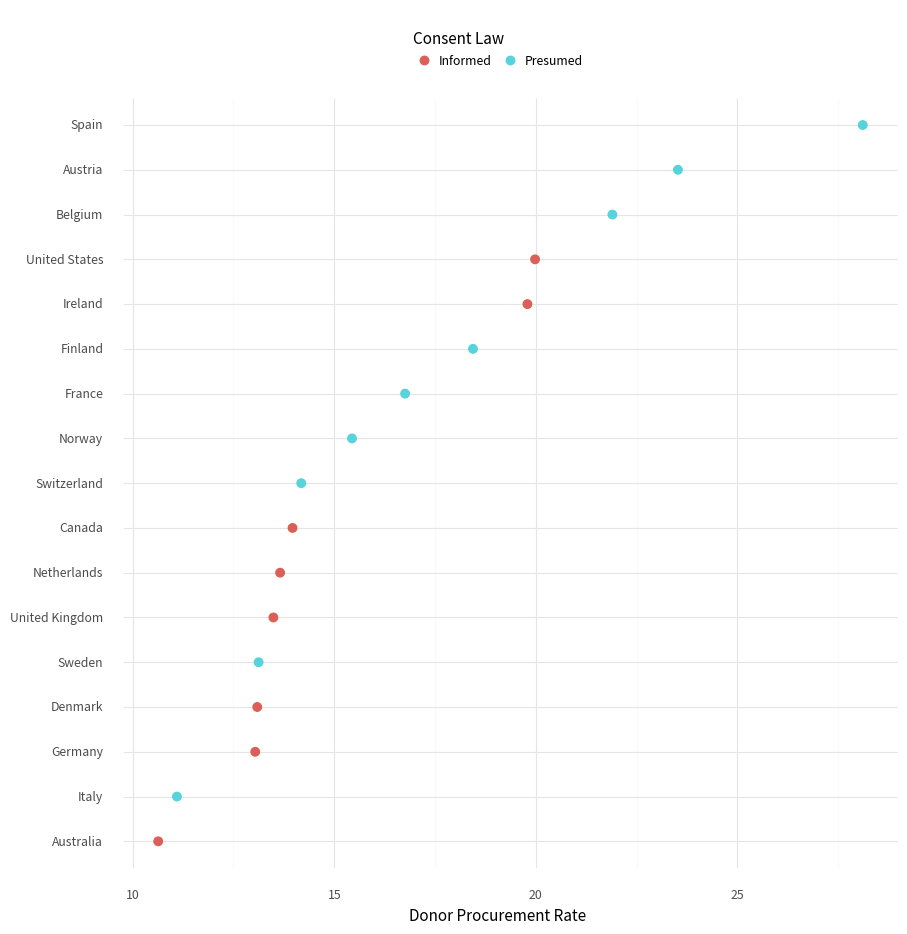

<ggplot: (8732306619733)>

In [14]:
# Fig. 5.13
by_country = organdata.groupby(
  ['consent_law', 'country']).agg(['mean', 'std']
).reset_index()
by_country.columns = [
  '_'.join(filter(lambda x: x !='', t)) for t in by_country.columns
]

p = ggplot(
  by_country,
  aes(x='donors_mean', y='reorder(country, donors_mean)', color='consent_law')
)
p + geom_point(size=3) + labs(
  x="Donor Procurement Rate",
  y="",
  color="Consent Law"
  ) + theme(legend_position="top")


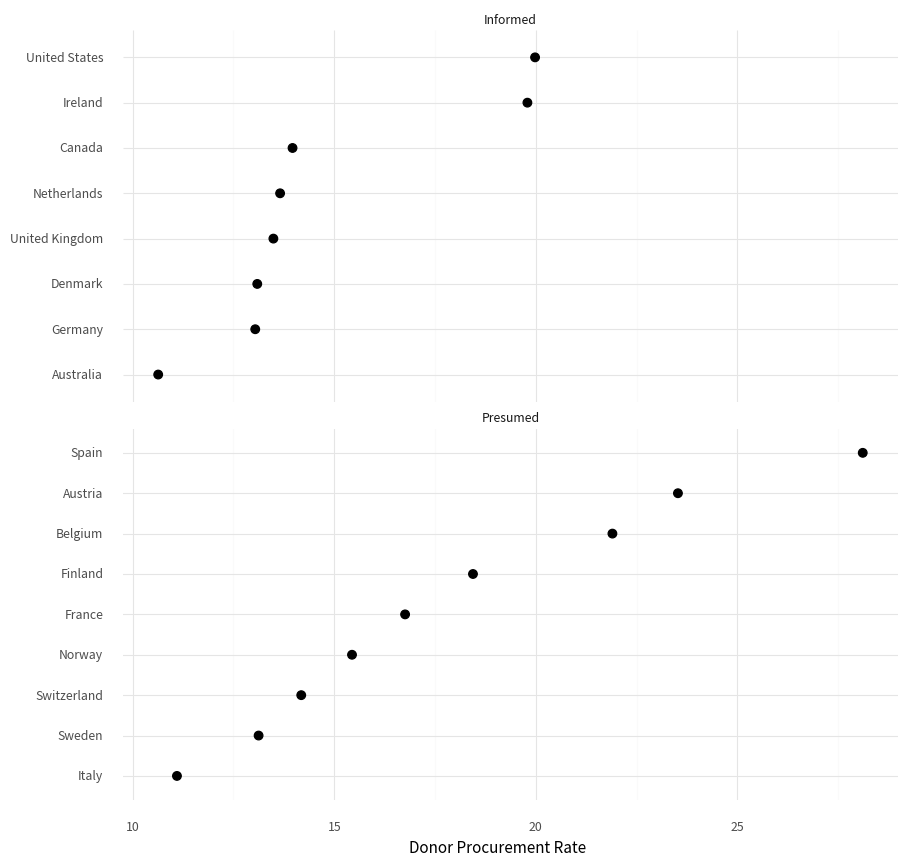

<ggplot: (8732306571834)>

In [15]:
# Fig. 5.14
p = ggplot(by_country, aes(x='donors_mean', y='reorder(country, donors_mean)'))
p + geom_point(size=3) + facet_wrap(
  'consent_law', scales="free_y", ncol=1
) + labs(
  x="Donor Procurement Rate",
  y=""
)

In [16]:
# Fig. 5.15
p = ggplot(by_country, aes(x='reorder(country, donors_mean)', y='donors_mean'))
p + geom_pointrange(
  aes(ymin='donors_mean - donors_sd',
      ymax='donors_mean + donors_sd')
) + labs(
  x="", y="Donor Procurement Rate") + coord_flip()

PlotnineError: "Could not evaluate the 'ymin' mapping: 'donors_mean - donors_sd' (original error: name 'donors_sd' is not defined)"

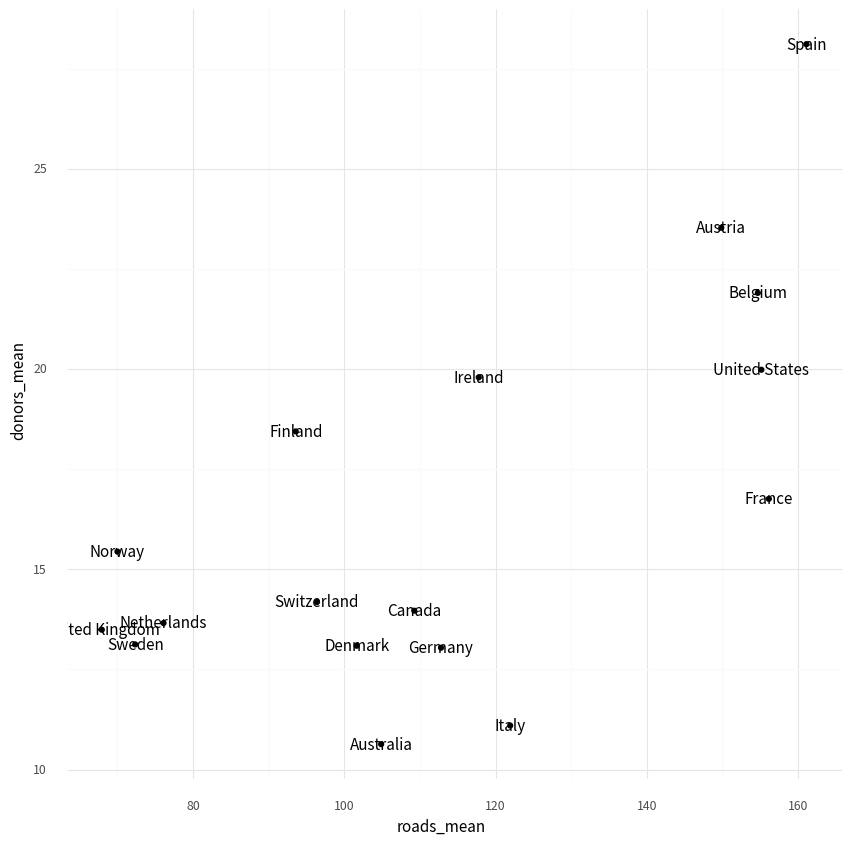

<ggplot: (8732306428880)>

In [17]:
# Fig. 5.16
p = ggplot(by_country, aes(x='roads_mean', y='donors_mean'))
p + geom_point() + geom_text(aes(label='country'))

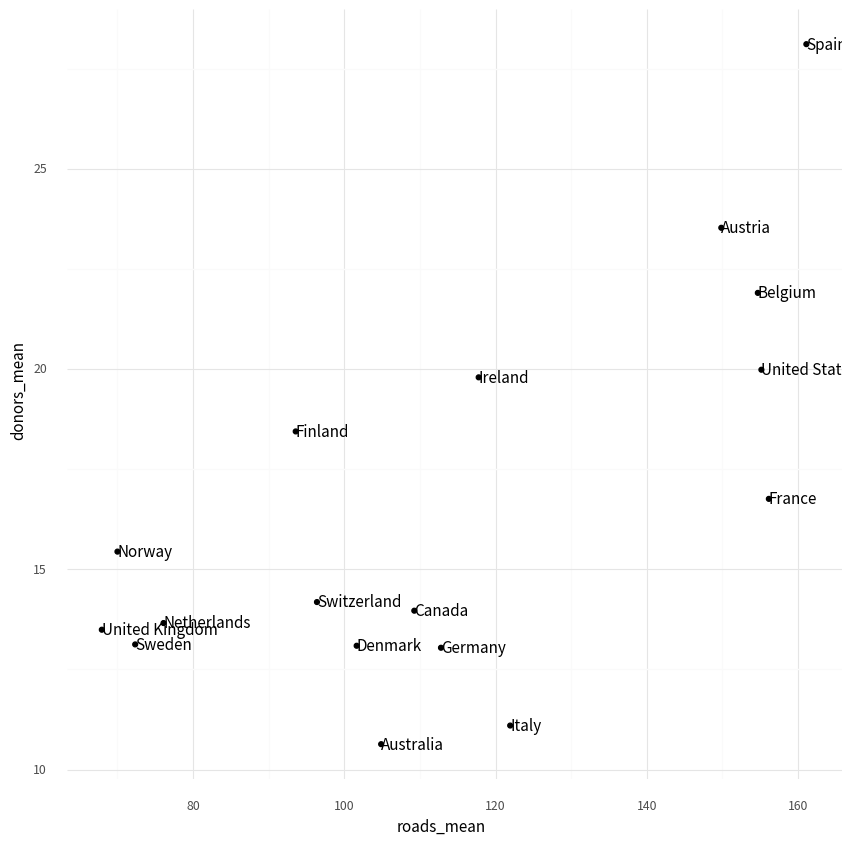

<ggplot: (8732306544147)>

In [18]:
# Fig. 5.17
# NOTE: you must specify `ha` instaed of `hjust`.
# NOTE: Similary `hjust` must be replaced with `va` 
p = ggplot(by_country, aes(x='roads_mean', y='donors_mean'))
p + geom_point() + geom_text(aes(label='country'), ha='left')

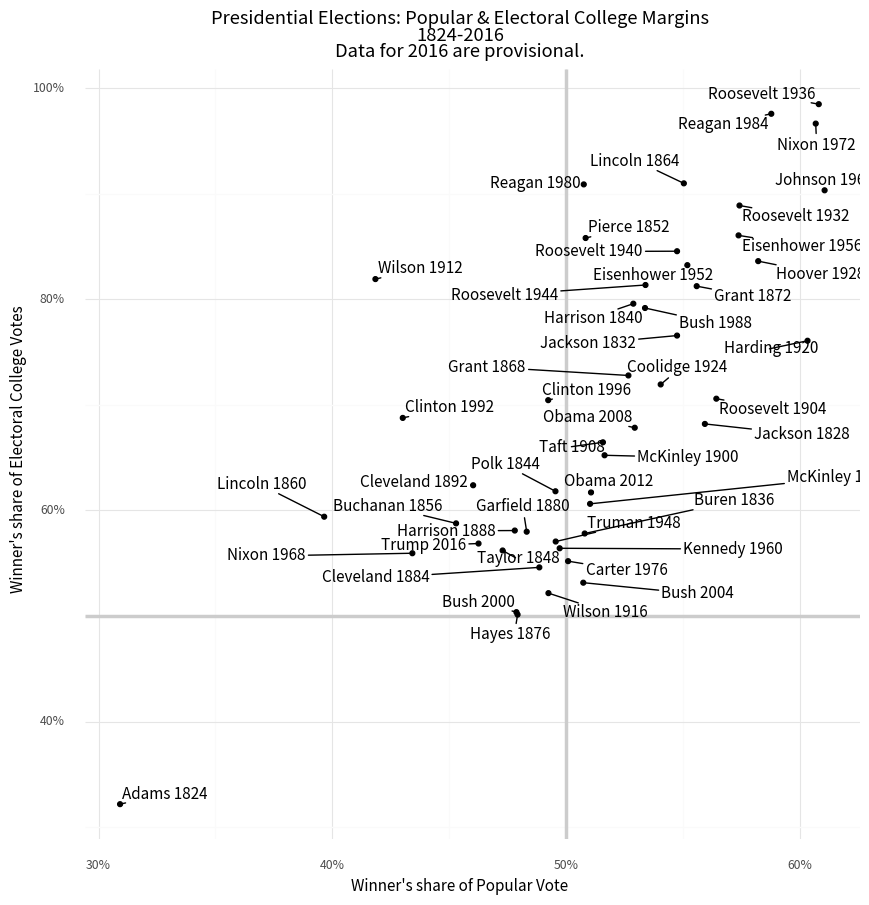

<ggplot: (8732306841863)>

In [19]:
# Fig. 5.18
# NOTE: Currently (v0.8) ggrepel::geom_text_repel is not available.
# Alternatively you can use `adjust_text` argument with adjust_text package,
# but this is not a complete substitution of ggrepel.
#
# NOTE: Currently (v0.8) both `subtitle` and `caption` arguments are not available.

p_title = "Presidential Elections: Popular & Electoral College Margins"
p_subtitle = "1824-2016"
p_caption = "Data for 2016 are provisional."
x_label = "Winner's share of Popular Vote"
y_label = "Winner's share of Electoral College Votes"

p = ggplot(
  elections_historic,
  aes(x='popular_pct', y='ec_pct', label='winner_label')
)
p + geom_hline(
  yintercept=0.5, size=1.4, color=colors.get('gray80')
  ) + geom_vline(
    xintercept=0.5, size=1.4, color=colors.get('gray80')
  ) + geom_point() + geom_text(
    nudge_x=0.1, nudge_y=0.1, adjust_text={'arrowprops': {'arrowstyle': '-'}}
  ) + scale_x_continuous(
    labels=percent_format()
  ) + scale_y_continuous(
    labels=percent_format()
  ) + labs(
    x=x_label,
    y=y_label,
    title='\n'.join([p_title, p_subtitle, p_caption]),
    subtitle=p_subtitle,
    caption=p_caption
)

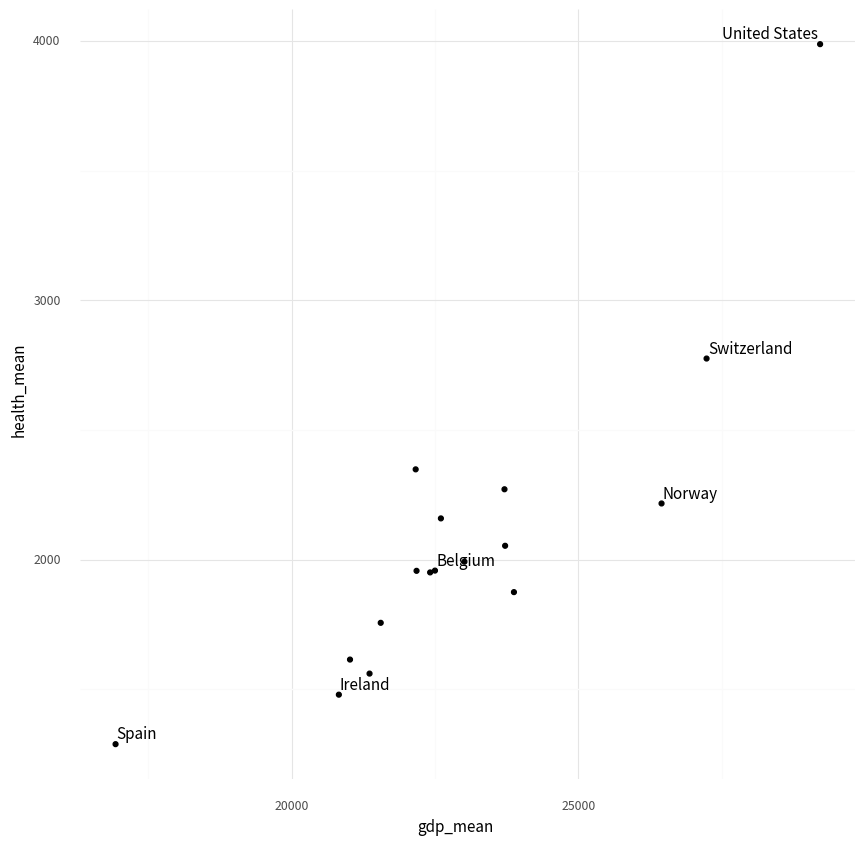

<ggplot: (8732306924313)>

In [20]:
# Fig. 5.19
p = ggplot(by_country, aes(x='gdp_mean', y='health_mean'))
p + geom_point() + geom_text(
  by_country.loc[lambda d: d['gdp_mean'] > 25000],
  aes(label='country')
)

p = ggplot(by_country, aes(x='gdp_mean', y='health_mean'))
p + geom_point(
) + geom_text(
  by_country.loc[lambda d: (d['gdp_mean'] > 25000) | (
      d['health_mean'] < 1500
    ) | (d['country'].isin(['Belgium']))],
  aes(label='country'),
  adjust_text={'arrowproprs': {'arrowstyle': '-'}}
)

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


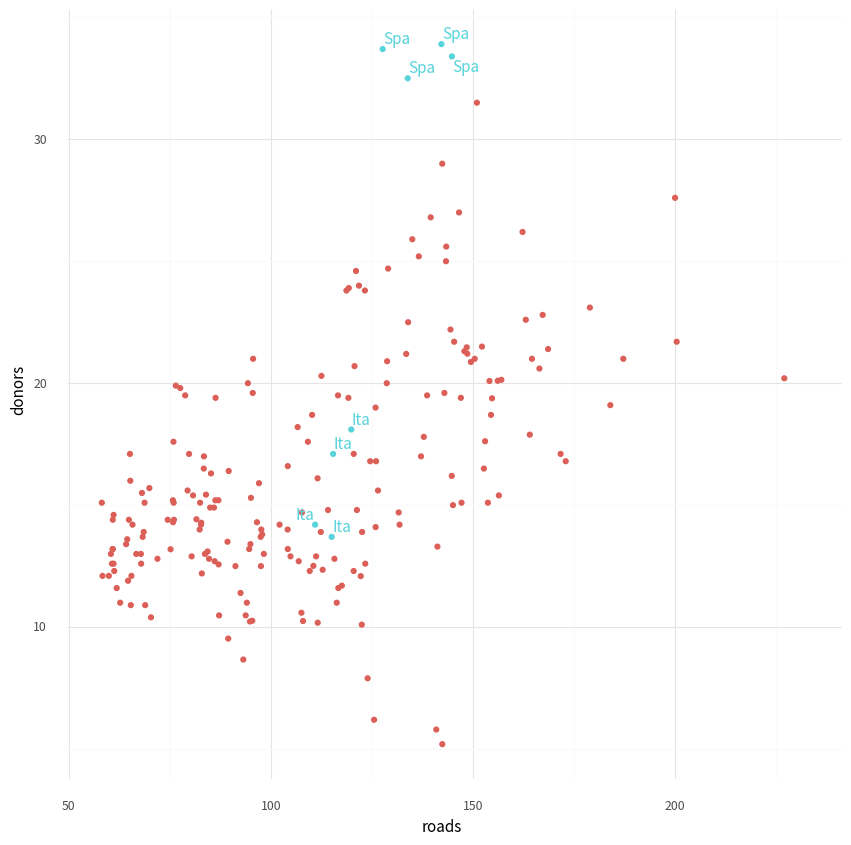

<ggplot: (8732307217722)>

In [21]:
# Fig. 5.20
organdata = organdata.assign(ind=lambda d: (
  d['ccode'].isin(['Ita', 'Spa'])) & (d['year'].dt.year > 1998))

p = ggplot(organdata, aes(x='roads', y='donors', color='ind'))
p + geom_point() + geom_text(
  organdata.loc[lambda d: d['ind']],
  aes(label='ccode'),
  adjust_text={'arrowproprs': {'arrowstyle': '-'}}
  ) + guides(
  label=False, color=False)

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


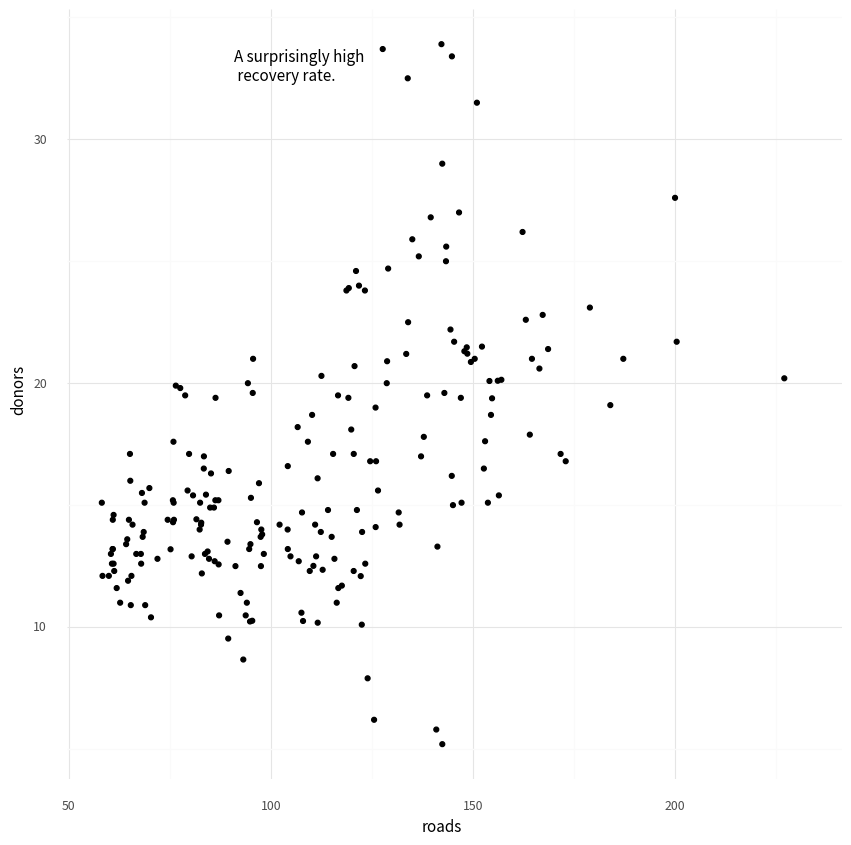

<ggplot: (8732308969933)>

In [22]:
# Fig. 5.21
p = ggplot(organdata, aes(x='roads', y='donors'))
p + geom_point(
) + annotate(
  geom="text", x=91, y=33,
  label="A surprisingly high \n recovery rate.",
  ha='left'
)

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


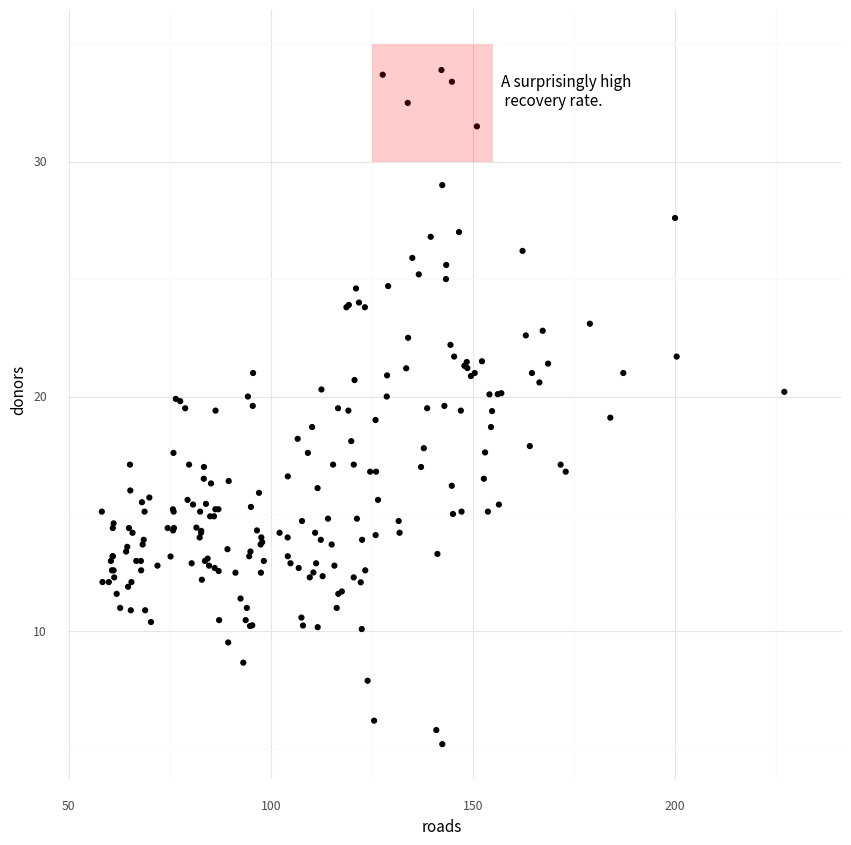

<ggplot: (8732306972998)>

In [23]:
# Fig. 5.22
p = ggplot(organdata, aes(x='roads', y='donors'))
p + geom_point() + annotate(
  geom='rect', xmin=125, xmax=155,
  ymin=30, ymax=35, fill='red', alpha=0.2
) + annotate(
  geom='text', x=157, y=33,
  label = "A surprisingly high \n recovery rate.",
  ha = 'left'
)

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


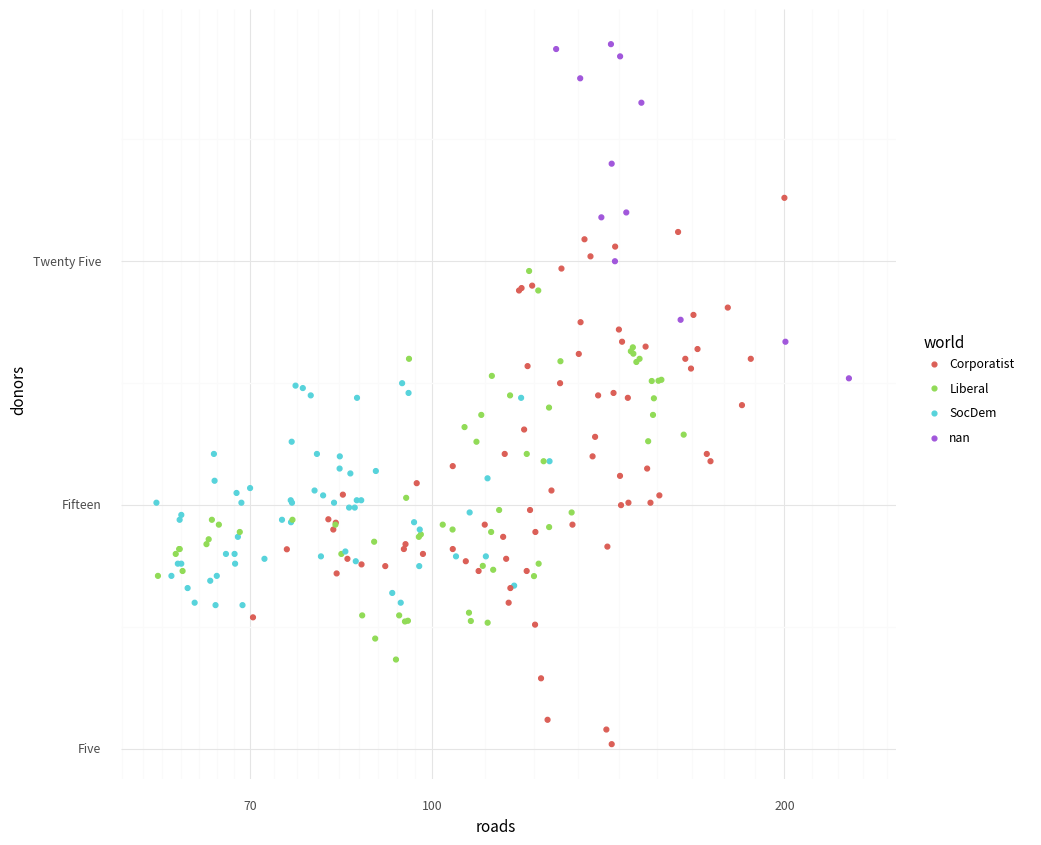

<ggplot: (8732306869200)>

In [24]:
# Fig. 5.23
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
p + geom_point()

# Fig. 5.25
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
p + geom_point() + scale_x_log10(
) + scale_y_continuous(
  breaks = [5, 15, 25],
  labels = ["Five", "Fifteen", "Twenty Five"]
)

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


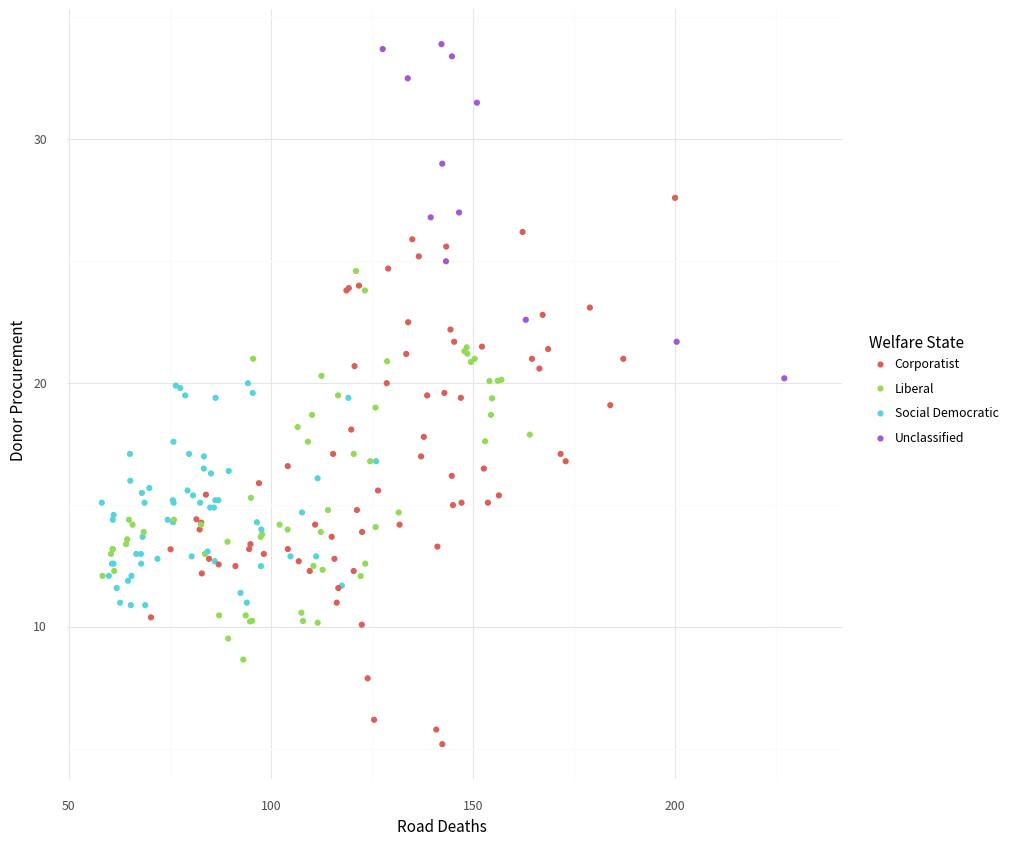

<ggplot: (8732307226378)>

In [25]:
# Fig. 5.26
p = ggplot(organdata, aes(x='roads', y='donors', color='world'))
p + geom_point() + scale_color_discrete(
  labels = ["Corporatist", "Liberal", "Social Democratic", "Unclassified"]
) + labs(
  x="Road Deaths",
  y="Donor Procurement",
  color="Welfare State")

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


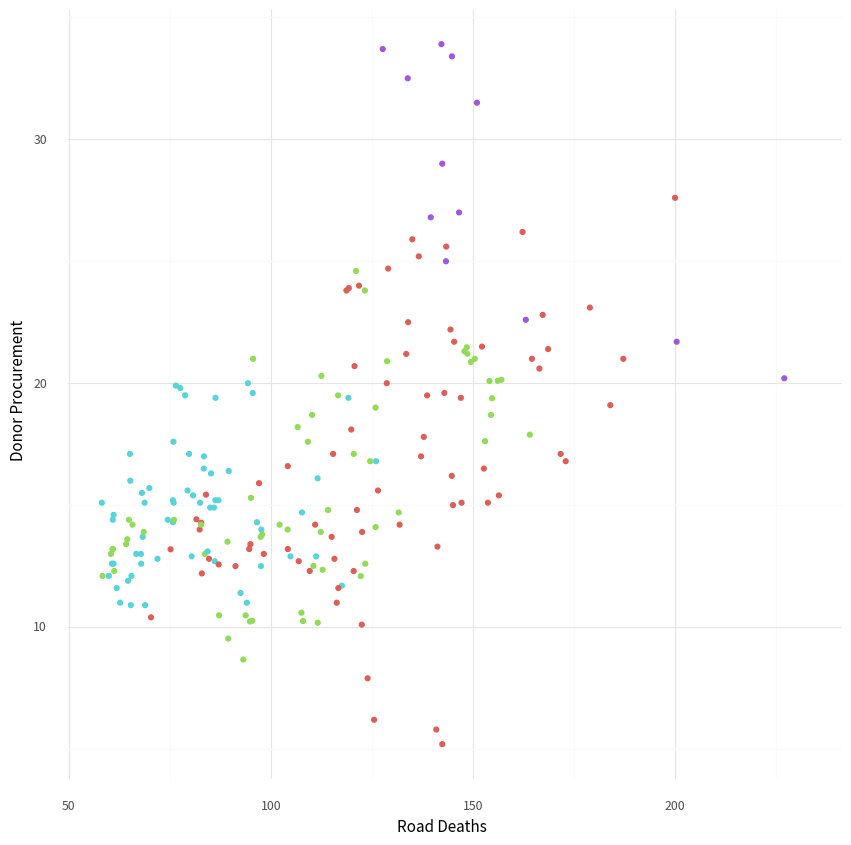

<ggplot: (8732306860153)>

In [26]:
# Fig. 5.27
p = ggplot(
  organdata,
  aes(x='roads', y='donors', color='world'))
p + geom_point() + labs(
  x="Road Deaths",
  y="Donor Procurement") + guides(color=False)